# 쇼핑몰 프로모션 효율 예측 분석

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [58]:
mem = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/member.csv")
tran = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/transaction.csv")

In [59]:
mem.head(2)

,id,recency,zip_code,is_referral,channel,conversion
0,906145,10,Surburban,0,Phone,0
1,184478,6,Rural,1,Web,0


In [60]:
tran.head(2)

,id,num_item,total_amount
0,906145,5,34000
1,906145,1,27000


In [61]:
# # 데이터프레임 생성
# data = pd.DataFrame({'id': [906145, 906145],
#                      'num_item': [5, 1],
#                      'total_amount': [34000, 27000]})

# # 거래 ID로 그룹화하여 합계 계산
# result = data.groupby('id').agg({'num_item': 'sum', 'total_amount': 'sum'}).reset_index()

# print(result)

* 쇼핑몰 고객 데이터, 프로모션 쿠폰을 발행하고 사용 여부 데이터를 수집
* mem: 고객 id, 최근 방문일, 사는지역, 추천여부, 주요접속채널, 쿠폰사용여부
* transaction: 고객id, 구매수량, 총 구매금액 정보가 있음
* 전통적 마케팅 분석 방법인 RFM 기법을 사용해 고객 데이터에서 파생변수 생성 후 분석
* Recency: 현재일 - 최근 구매일
* Frequency: 구매 빈도
* Monetary: 구매금액

In [62]:
mem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           64000 non-null  int64 
 1   recency      64000 non-null  int64 
 2   zip_code     64000 non-null  object
 3   is_referral  64000 non-null  int64 
 4   channel      64000 non-null  object
 5   conversion   64000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.9+ MB


In [63]:
tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196836 entries, 0 to 196835
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   id            196836 non-null  int64
 1   num_item      196836 non-null  int64
 2   total_amount  196836 non-null  int64
dtypes: int64(3)
memory usage: 4.5 MB


In [64]:
mem.describe()

,id,recency,is_referral,conversion
count,64000.000000,64000.000000,64000.000000,64000.000000
mean,550694.137797,5.763734,0.502250,0.146781
std,259105.689773,3.507592,0.499999,0.353890
min,100001.000000,1.000000,0.000000,0.000000
25%,326772.000000,2.000000,0.000000,0.000000
50%,551300.000000,6.000000,1.000000,0.000000
75%,774914.500000,9.000000,1.000000,0.000000
max,999997.000000,12.000000,1.000000,1.000000


<Axes: >

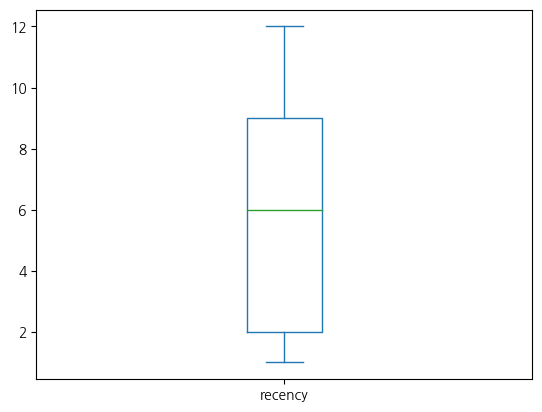

In [65]:
mem['recency'].plot(kind='box')

In [66]:
tran.describe()

,id,num_item,total_amount
count,196836.000000,196836.000000,196836.000000
mean,550557.552932,3.078365,21837.102969
std,259254.795613,1.478408,8218.005565
min,100001.000000,1.000000,8000.000000
25%,326719.000000,2.000000,15000.000000
50%,550918.000000,3.000000,22000.000000
75%,774916.000000,4.000000,29000.000000
max,999997.000000,6.000000,38000.000000


<Axes: >

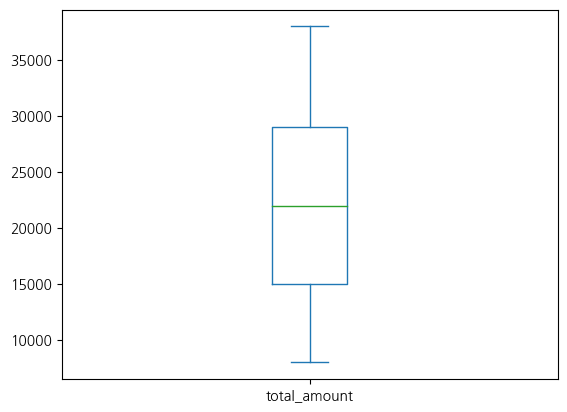

In [67]:
tran['total_amount'].plot(kind='box')

In [68]:
tran.head()

,id,num_item,total_amount
0,906145,5,34000
1,906145,1,27000
2,906145,4,33000
3,184478,4,29000
4,394235,4,33000


In [69]:
# id별 num_item, total_amount 합계
tran_total = tran.groupby('id')[['num_item','total_amount']].sum()

In [70]:
tran_total

,num_item,total_amount
id,,
100001,7,52000
100008,5,26000
100032,8,62000
100036,15,129000
100070,13,85000
...,...,...
999932,5,32000
999981,8,91000
999990,9,84000


In [71]:
# / 하나면 소수점까지 몫만 나오게 하려면 // 두개
tran_total['mean_amount'] = tran_total['total_amount'] // tran_total['num_item']

In [72]:
tran_total

,num_item,total_amount,mean_amount
id,,,
100001,7,52000,7428
100008,5,26000,5200
100032,8,62000,7750
100036,15,129000,8600
100070,13,85000,6538
...,...,...,...
999932,5,32000,6400
999981,8,91000,11375
999990,9,84000,9333


In [73]:
frequency=tran['id'].value_counts()

In [82]:
frequency=pd.DataFrame(frequency)

In [83]:
frequency

,count
id,
691067,5
720147,5
422265,5
670720,5
154620,5
...,...
881780,1
154471,1
480462,1


In [78]:
# 자동 이너 조인 merge랑 join 같음 사용법만 다름
tran_total=tran_total.join(frequency, on='id')

In [79]:
tran_total

,num_item,total_amount,mean_amount,count
id,,,,
100001,7,52000,7428,2
100008,5,26000,5200,1
100032,8,62000,7750,3
100036,15,129000,8600,5
100070,13,85000,6538,4
...,...,...,...,...
999932,5,32000,6400,1
999981,8,91000,11375,4
999990,9,84000,9333,3


In [85]:
tran_total=tran_total.rename(columns={'count':'frequency'})

In [86]:
tran_total

,num_item,total_amount,mean_amount,frequency
id,,,,
100001,7,52000,7428,2
100008,5,26000,5200,1
100032,8,62000,7750,3
100036,15,129000,8600,5
100070,13,85000,6538,4
...,...,...,...,...
999932,5,32000,6400,1
999981,8,91000,11375,4
999990,9,84000,9333,3


In [88]:
data = pd.merge(mem,tran_total, how='inner',on='id')

In [89]:
data

,id,recency,zip_code,is_referral,channel,conversion,num_item,total_amount,mean_amount,frequency
0,906145,10,Surburban,0,Phone,0,10,94000,9400,3
1,184478,6,Rural,1,Web,0,4,29000,7250,1
2,394235,7,Surburban,1,Web,0,8,41000,5125,2
3,130152,9,Rural,1,Web,0,7,83000,11857,4
4,940352,2,Urban,0,Web,0,3,31000,10333,1
...,...,...,...,...,...,...,...,...,...,...
63995,838295,10,Urban,0,Web,0,14,104000,7428,4
63996,547316,5,Urban,1,Phone,0,9,89000,9888,5
63997,131575,6,Urban,1,Phone,0,8,61000,7625,2
63998,603659,1,Surburban,1,Multichannel,0,16,108000,6750,5


In [ ]:
# 카테고리 변수(zip_code,channel) 종류 파악 후 더미변수로 만들기

In [90]:
data['zip_code'].value_counts()

zip_code
Surburban    28776
Urban        25661
Rural         9563
Name: count, dtype: int64

In [92]:
data.groupby('zip_code')['conversion'].value_counts(sort=False)

zip_code   conversion
Rural      0              7764
           1              1799
Surburban  0             24749
           1              4027
Urban      0             22093
           1              3568
Name: count, dtype: int64

In [94]:
# 클래스 2게일때 범주형 계산 함수
def c_ratio(x):
    for idx, item in zip(x.index,x):
        if idx[1] == 0:
            under_50 = item
        else:
            upper_50 = item
            class_ratio = upper_50 / (upper_50 + under_50) * 100
            print(idx, f'{class_ratio:.2f}%') # t소수점2자리만 .2로 포매팅

In [95]:
c_ratio(data.groupby('zip_code')['conversion'].value_counts(sort=False))

('Rural', 1) 18.81%
('Surburban', 1) 13.99%
('Urban', 1) 13.90%


In [96]:
data.groupby('zip_code')[['num_item','total_amount','mean_amount','frequency']].mean()

,num_item,total_amount,mean_amount,frequency
zip_code,,,,
Rural,9.677298,68149.325525,8036.516156,3.109380
Surburban,9.438873,67007.541006,8096.941514,3.068529
Urban,9.421924,66965.706714,8144.102841,3.070847


In [97]:
data['channel'].value_counts()

channel
Web             28217
Phone           28021
Multichannel     7762
Name: count, dtype: int64

In [98]:
data.groupby('channel')[['num_item','total_amount','mean_amount','frequency']].mean()

,num_item,total_amount,mean_amount,frequency
channel,,,,
Multichannel,9.473718,67182.169544,8106.270549,3.063772
Phone,9.416937,66936.155027,8129.841619,3.073445
Web,9.516462,67379.310345,8084.114257,3.080909


In [99]:
c_ratio(data.groupby('is_referral')['conversion'].value_counts(sort=False))

(0, 1) 17.31%
(1, 1) 12.07%


In [102]:
# 더미변수화 시작
data = pd.get_dummies(data, columns=['zip_code','channel'], drop_first=True)

In [104]:
data.head()

,id,recency,is_referral,conversion,num_item,total_amount,mean_amount,frequency,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web
0,906145,10,0,0,10,94000,9400,3,True,False,True,False
1,184478,6,1,0,4,29000,7250,1,False,False,False,True
2,394235,7,1,0,8,41000,5125,2,True,False,False,True
3,130152,9,1,0,7,83000,11857,4,False,False,False,True
4,940352,2,0,0,3,31000,10333,1,False,True,False,True


In [106]:
X = data.drop(['id','conversion'], axis=1)
y = data['conversion']

In [ ]:
# 이상값 없으니까 minmax나(0~1사이) standard(-1~1??) 스케일링 시작

In [107]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [110]:
scale = MinMaxScaler()
X_mx_scaled = scale.fit_transform(X)
scale2 = StandardScaler()
X_std_scaled = scale2.fit_transform(X)

In [111]:
X_mx_scaled = pd.DataFrame(X_mx_scaled, columns=X.columns)
X_mx_scaled.head()

,recency,is_referral,num_item,total_amount,mean_amount,frequency,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web
0,0.818182,0.0,0.333333,0.488636,0.233533,0.50,1.0,0.0,1.0,0.0
1,0.454545,1.0,0.111111,0.119318,0.169162,0.00,0.0,0.0,0.0,1.0
2,0.545455,1.0,0.259259,0.187500,0.105539,0.25,1.0,0.0,0.0,1.0
3,0.727273,1.0,0.222222,0.426136,0.307096,0.75,0.0,0.0,0.0,1.0
4,0.090909,0.0,0.074074,0.130682,0.261467,0.00,0.0,1.0,0.0,1.0


In [112]:
X_std_scaled = pd.DataFrame(X_std_scaled, columns=X.columns)
X_std_scaled.head()

,recency,is_referral,num_item,total_amount,mean_amount,frequency,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web
0,1.207751,-1.00451,0.105664,0.797515,0.295355,-0.054589,1.106380,-0.818119,1.133138,-0.888008
1,0.067359,0.99551,-1.085368,-1.133973,-0.195694,-1.499455,-0.903849,-0.818119,-0.882505,1.126116
2,0.352457,0.99551,-0.291347,-0.777391,-0.681032,-0.777022,1.106380,-0.818119,-0.882505,1.126116
3,0.922653,0.99551,-0.489852,0.470648,0.856521,0.667844,-0.903849,-0.818119,-0.882505,1.126116
4,-1.073034,-1.00451,-1.283873,-1.074543,0.508447,-1.499455,-0.903849,1.222316,-0.882505,1.126116


In [113]:
from sklearn.model_selection import train_test_split

In [114]:
# minmax 스케일링한 데이터셋
X_train, X_test, y_train, y_test = train_test_split(X_mx_scaled, y, test_size=0.3, random_state = 10)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state = 10)

In [116]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9600 entries, 33026 to 59402
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   recency             9600 non-null   float64
 1   is_referral         9600 non-null   float64
 2   num_item            9600 non-null   float64
 3   total_amount        9600 non-null   float64
 4   mean_amount         9600 non-null   float64
 5   frequency           9600 non-null   float64
 6   zip_code_Surburban  9600 non-null   float64
 7   zip_code_Urban      9600 non-null   float64
 8   channel_Phone       9600 non-null   float64
 9   channel_Web         9600 non-null   float64
dtypes: float64(10)
memory usage: 825.0 KB


In [117]:
# Standard 스케일링 한 데이터셋
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_std_scaled, y, test_size=0.3, random_state = 10)
X_valid2, X_test2, y_valid2, y_test2 = train_test_split(X_test2, y_test2, test_size=0.5, random_state = 10)

In [122]:
y.value_counts()

conversion
0    54606
1     9394
Name: count, dtype: int64

In [123]:
9394 / (54606+9394)*100

14.678125

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [121]:
rfc_mx = RandomForestClassifier(n_estimators=100, max_depth=3, n_jobs=-1, random_state=10)
rfc_mx.fit(X_train, y_train)
pred_mx = rfc_mx.predict(X_valid)
print(accuracy_score(y_valid, pred_mx))
print(confusion_matrix(y_valid, pred_mx))
print(classification_report(y_valid, pred_mx))

0.8496875
[[8157    0]
 [1443    0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8157
           1       0.00      0.00      0.00      1443

    accuracy                           0.85      9600
   macro avg       0.42      0.50      0.46      9600
weighted avg       0.72      0.85      0.78      9600



C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [124]:
rfc_std = RandomForestClassifier(n_estimators=100, max_depth=3, n_jobs=-1, random_state=10)
rfc_std.fit(X_train2, y_train2)
pred_std = rfc_std.predict(X_valid2)
print(accuracy_score(y_valid2, pred_std))
print(confusion_matrix(y_valid2, pred_std))
print(classification_report(y_valid2, pred_std))

0.8496875
[[8157    0]
 [1443    0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8157
           1       0.00      0.00      0.00      1443

    accuracy                           0.85      9600
   macro avg       0.42      0.50      0.46      9600
weighted avg       0.72      0.85      0.78      9600



C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [127]:
from xgboost import XGBClassifier
xgb_mx = XGBClassifier(n_estimators=1000,n_jobs=-1,learning_rate=0.01,random_state=10)
xgb_mx.fit(X_train, y_train)
pred_xgb_mx = xgb_mx.predict(X_valid)
print(accuracy_score(y_valid, pred_xgb_mx))
print(classification_report(y_valid, pred_xgb_mx))

0.8638541666666667
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      8157
           1       0.73      0.15      0.25      1443

    accuracy                           0.86      9600
   macro avg       0.80      0.57      0.59      9600
weighted avg       0.85      0.86      0.82      9600



In [129]:
from xgboost import XGBClassifier
xgb_std = XGBClassifier(n_estimators=1000,n_jobs=-1,learning_rate=0.01,random_state=10)
xgb_std.fit(X_train2, y_train2)
pred_xgb_std = xgb_std.predict(X_valid2)
print(accuracy_score(y_valid2, pred_xgb_std))
print(classification_report(y_valid2, pred_xgb_std))

0.8638541666666667
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      8157
           1       0.73      0.15      0.25      1443

    accuracy                           0.86      9600
   macro avg       0.80      0.57      0.59      9600
weighted avg       0.85      0.86      0.82      9600



# 하이퍼 파라미터 튜닝

## 그리드서치
* manual Search에 비해, Grid Search는 체계적인 방식으로 하이퍼파라미터 최적화를 수행
* Grid Search는 모든 parameter의 경우의 수에 대해 Cross-validation 결과가 가장 좋은 parameter를 고르는 방법
* 전체 탐색 대상 구간, 간격은 분석가의 지정이 필요하나 균등하고 전역적인 탐색이 가능하다는 장점이 있음.
* 단, 하이퍼파라미터의 갯수가 많아질수록 전체 탐색 시간이 기하급수적으로 증가

In [130]:
from sklearn.model_selection import GridSearchCV

In [131]:
params = dict(max_depth=[3,5,10], n_estimators=[100,500,1000],learning_rate=[0.01, 0.05, 0.1])
params

{'max_depth': [3, 5, 10],
 'n_estimators': [100, 500, 1000],
 'learning_rate': [0.01, 0.05, 0.1]}

In [139]:
grid_cv = GridSearchCV(xgb_mx, param_grid=params, cv=5, n_jobs=-1, verbose=3)
grid_cv.fit(X_train, y_train)
pred = grid_cv.predict(X_valid)
print(sorted(grid_cv.cv_results_.keys()))
print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print(f'최고 예측 정확도: {grid_cv.best_score_:.4f}')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_learning_rate', 'param_max_depth', 'param_n_estimators', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']
최적 하이퍼 파라미터:  {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500}
최고 예측 정확도: 0.8673


## 랜덤서치
* GridSearch가 전수조사라면 RandomSearch는 표본조사
* 하이퍼파라미터 값을 랜덤 샘플링해 선정
* RandomSEarch는 GridSearch에 비해 불필요한 반복 수행 횟수를 대폭 줄이면서, 동시에 정해진 간격 사이에 위치한 값들에 대해서도 확률적으로 탐색이 가능하므로 최적 하이퍼파라미터를 더 빨리 찾을 수 있다.

In [137]:
from sklearn.model_selection import RandomizedSearchCV

In [140]:
rand_cv = RandomizedSearchCV(xgb_mx, param_distributions=params, n_iter=100, cv=5, n_jobs=-1, verbose=3)
rand_cv.fit(X_train, y_train)
pred = rand_cv.predict(X_test)
print(sorted(rand_cv.cv_results_.keys()))
print('최적 하이퍼 파라미터: ', rand_cv.best_params_)
print(f'최고 예측 정확도: {rand_cv.best_score_:.4f}')

C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 27 is smaller than n_iter=100. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 27 candidates, totalling 135 fits
['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_learning_rate', 'param_max_depth', 'param_n_estimators', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']
최적 하이퍼 파라미터:  {'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.05}
최고 예측 정확도: 0.8673


In [141]:
pred_xgb_mx = xgb_mx.predict(X_test)
print(accuracy_score(y_test, pred_xgb_mx))
print(classification_report(y_test, pred_xgb_mx))

0.8657291666666667
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      8191
           1       0.72      0.14      0.23      1409

    accuracy                           0.87      9600
   macro avg       0.80      0.56      0.58      9600
weighted avg       0.85      0.87      0.82      9600



## 베이지안 옵티마이저
* Bayesian Optimiztion은 베이즈 정리에 의해서 사후 확률을 통해 최적값을 예측해 최적 파라미터를 업데이트

In [142]:
from skopt import BayesSearchCV

In [144]:
X_train

,recency,is_referral,num_item,total_amount,mean_amount,frequency,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web
53187,0.090909,0.0,0.481481,0.562500,0.180898,1.00,0.0,1.0,0.0,1.0
32554,0.818182,0.0,0.296296,0.312500,0.161677,0.50,0.0,1.0,1.0,0.0
54789,0.818182,0.0,0.370370,0.193182,0.066407,0.25,0.0,0.0,0.0,1.0
59643,0.090909,0.0,0.370370,0.465909,0.197036,1.00,1.0,0.0,0.0,1.0
34362,0.090909,1.0,0.370370,0.403409,0.167096,0.50,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
28017,0.454545,1.0,0.444444,0.352273,0.113293,0.50,0.0,0.0,1.0,0.0
50496,0.636364,1.0,0.148148,0.261364,0.275449,0.25,0.0,1.0,0.0,0.0
29199,0.090909,0.0,0.444444,0.579545,0.205419,1.00,0.0,1.0,0.0,1.0
40061,0.818182,0.0,0.296296,0.284091,0.145030,0.50,1.0,0.0,1.0,0.0


In [143]:
bocv = BayesSearchCV(xgb_mx, search_spaces=params, cv=5, n_jobs=-1, verbose=3)
bocv.fit(X_train, y_train)
print(f"val score: {bocv.best_score_:.4f}")
print(f"test score: {bocv.score(X_valid, y_valid)}")
print(f"최적 하이퍼파라미터: {bocv.best_params_}")

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [145]:
y.value_counts()

conversion
0    54606
1     9394
Name: count, dtype: int64

In [161]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [158]:
y_res.value_counts()

conversion
0    38258
1    38258
Name: count, dtype: int64

In [149]:
X_train_smt, X_test_smt, y_train_smt, y_test_smt = train_test_split(X_res, y_res, test_size=0.4, random_state=10)

In [159]:
rand_cv = RandomizedSearchCV(xgb_mx, param_distributions=params, n_iter=100, cv=5, n_jobs=-1, verbose=3)
rand_cv.fit(X_train_smt, y_train_smt)
pred = rand_cv.predict(X_test_smt)
print(sorted(rand_cv.cv_results_.keys()))
print('최적 하이퍼 파라미터: ', rand_cv.best_params_)
print(f'최고 예측 정확도: {rand_cv.best_score_:.4f}')

C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 27 is smaller than n_iter=100. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 27 candidates, totalling 135 fits


KeyboardInterrupt: 

In [152]:
xgb_std = XGBClassifier(n_estimators=1000, n_job=-1,learning_rate=0.01, random_state=10)
xgb_std.fit(X_train_smt,y_train_smt)
pred_xgb_mx_smt = xgb_std.predict(X_test_smt)
print(accuracy_score(y_test_smt, pred_xgb_mx_smt))
print(classification_report(y_test_smt, pred_xgb_mx_smt))

C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\xgboost\core.py:160: UserWarning: [17:53:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_job" } are not used.

  warnings.warn(smsg, UserWarning)


0.8437907748655145
              precision    recall  f1-score   support

           0       0.83      0.86      0.85     21866
           1       0.86      0.82      0.84     21819

    accuracy                           0.84     43685
   macro avg       0.84      0.84      0.84     43685
weighted avg       0.84      0.84      0.84     43685



In [162]:
xgb_std = XGBClassifier(max_depth=10, n_estimators=500, n_job=-1,learning_rate=0.01, random_state=10)
xgb_std.fit(X_train_smt,y_train_smt)
pred_xgb_mx_smt = xgb_std.predict(X_test_smt)
print(accuracy_score(y_test_smt, pred_xgb_mx_smt))
print(classification_report(y_test_smt, pred_xgb_mx_smt))

C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\xgboost\core.py:160: UserWarning: [18:00:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_job" } are not used.

  warnings.warn(smsg, UserWarning)


0.8497195833810233
              precision    recall  f1-score   support

           0       0.84      0.87      0.85     21866
           1       0.86      0.83      0.85     21819

    accuracy                           0.85     43685
   macro avg       0.85      0.85      0.85     43685
weighted avg       0.85      0.85      0.85     43685



In [156]:
from sklearn.cluster import MiniBatchKMeans
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(
    estimator=MiniBatchKMeans(n_init=1, random_state=0), random_state=42
)
X_res2, y_res2 = cc.fit_resample(X, y)

In [163]:
y_res2.value_counts()

conversion
0    9394
1    9394
Name: count, dtype: int64